In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() #targets are 2D (N x 1 instead of N)
print("x_train sahpe:", x_train.shape)
print("y_train sahpe:", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train sahpe: (50000, 32, 32, 3)
y_train sahpe: (50000,)


In [3]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
# Build the model with Keras Functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i) 
x = Conv2D(64, (3,3), strides=2, activation='relu')(x) 
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [5]:
# compile and fit
# use GPU for this

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5698 - accuracy: 0.4259 - val_loss: 1.2831 - val_accuracy: 0.5449
Epoch 2/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2771 - accuracy: 0.5397 - val_loss: 1.1468 - val_accuracy: 0.5789
Epoch 3/15
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1492 - accuracy: 0.5877 - val_loss: 1.0782 - val_accuracy: 0.6150
Epoch 4/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0600 - accuracy: 0.6217 - val_loss: 0.9810 - val_accuracy: 0.6596
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9858 - accuracy: 0.6480 - val_loss: 0.9481 - val_accuracy: 0.6669
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9241 - accuracy: 0.6727 - val_loss: 0.9284 - val_accuracy: 0.6747
Epoch 7/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8716 - accuracy: 0.6898 - val_loss: 0.9227 -

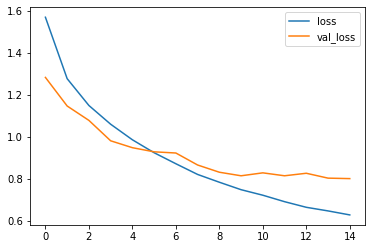

In [6]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

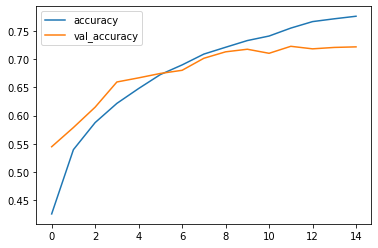

In [7]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 6s 17ms/step
Confusion confusion matrix, w/o normalization
[[764  12  39  14  21   9  11  12  77  41]
 [ 23 830   0   7   4   4  12   6  24  90]
 [ 63  11 536  61 133  61  63  41  19  12]
 [ 25  10  64 516  87 149  73  48   9  19]
 [ 17   5  47  51 720  26  37  77  17   3]
 [  8   9  30 195  58 589  33  58  10  10]
 [  7   3  24  61  56  19 801   9  16   4]
 [  9   3  11  39  66  46   5 801   6  14]
 [ 62  22  11  12   8   4   4   7 852  18]
 [ 40  69   5  15   8   5   5  16  28 809]]


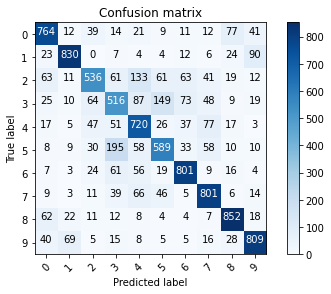

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion confusion matrix, w/o normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [9]:
# labels
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()


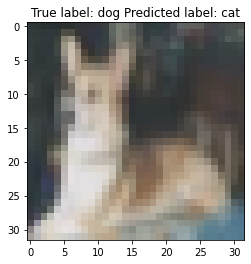

In [12]:
# show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3), cmap = 'gray')
plt.title("True label: %s Predicted label: %s" % (labels[y_test[i]],labels[p_test[i]]));